Intall all important library

In [ ]:
!pip install --upgrade scikit-image
!pip install --upgrade imutils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.5/313.5 kB 18.3 MB/s eta 0:00:00
  Attempting uninstall: imageio
    Found existing installation: imageio 2.31.6
    Uninstalling imageio-2.31.6:
      Successfully uninstalled imageio-2.31.6
  Attempting uninstall: scikit-image
    Found existing installation: scikit-image 0.19.3
    Uninstalling scikit-image-0.19.3:
      Successfully uninstalled scikit-image-0.19.3


In [ ]:
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 12.2 MB/s eta 0:00:00


In [ ]:
!pip install argparse

In [ ]:
!python your_script.py -f image1.jpg -s image2.jpg

python3: can't open file '/content/your_script.py': [Errno 2] No such file or directory


## Load the RGB images and convert into GrayScale images

In [ ]:
from skimage.metrics import structural_similarity as compare_ssim
import argparse
import imutils
import cv2

# Simulating command-line arguments in Google Colab
args = {"first": "/content/input1.png", "second": "/content/input2.png"}

# Access the argument values
first_image_path = args["first"]
second_image_path = args["second"]

# Load the images with error handling
try:
    first_image = cv2.imread(first_image_path)
    second_image = cv2.imread(second_image_path)

    # Check if the images are loaded successfully
    if first_image is None or second_image is None:
        raise FileNotFoundError("One or both of the images could not be loaded.")
except Exception as e:
    print("Error:", e)
else:
    # convert the images to grayscale
    grayA = cv2.cvtColor(first_image, cv2.COLOR_BGR2GRAY)
    grayB = cv2.cvtColor(second_image, cv2.COLOR_BGR2GRAY)

    # Example: Perform SSIM comparison
    score, diff = compare_ssim(grayA, grayB, full=True)

    print("SSIM:", score)


SSIM: 0.9388101913918601


In [ ]:
print(diff)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


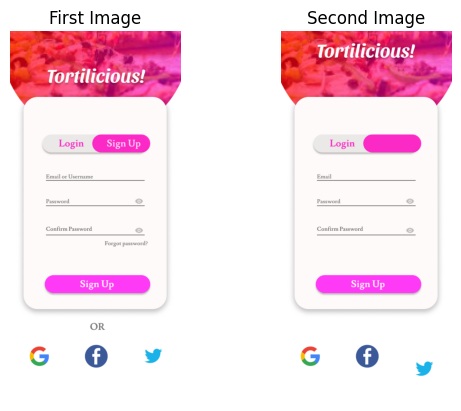

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and set of subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2)

# Display the first image on the first subplot
axes[0].imshow(cv2.cvtColor(first_image, cv2.COLOR_BGR2RGB))
axes[0].set_title('First Image')

# Display the second image on the second subplot
axes[1].imshow(cv2.cvtColor(second_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Second Image')

# Hide the axes
for ax in axes:
    ax.axis('off')

# Show the plot
plt.show()


In [ ]:
# compute the Structural Similarity Index (SSIM) between the two
# images, ensuring that the difference image is returned
(score, diff) = compare_ssim(grayA, grayB, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(score))
print(diff)

SSIM: 0.9388101913918601
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [ ]:
# # threshold the difference image, followed by finding contours to
# # obtain the regions of the two input images that differ
# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
# threshold the difference image, followed by finding contours to
# obtain the regions of the two input images that differ
_, thresh = cv2.threshold(diff, 0, 255,
	cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)



## Preprocessing over the gray images

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
# loop over the contours
for c in contours:
	# compute the bounding box of the contour and then draw the
	# bounding box on both input images to represent where the two
	# images differ
	(x, y, w, h) = cv2.boundingRect(c)
	cv2.rectangle(first_image, (x, y), (x + w, y + h), (0, 0, 255), 2)
	cv2.rectangle(second_image, (x, y), (x + w, y + h), (0, 0, 255), 2)
# show the output images


# Final Output of difference in two images.

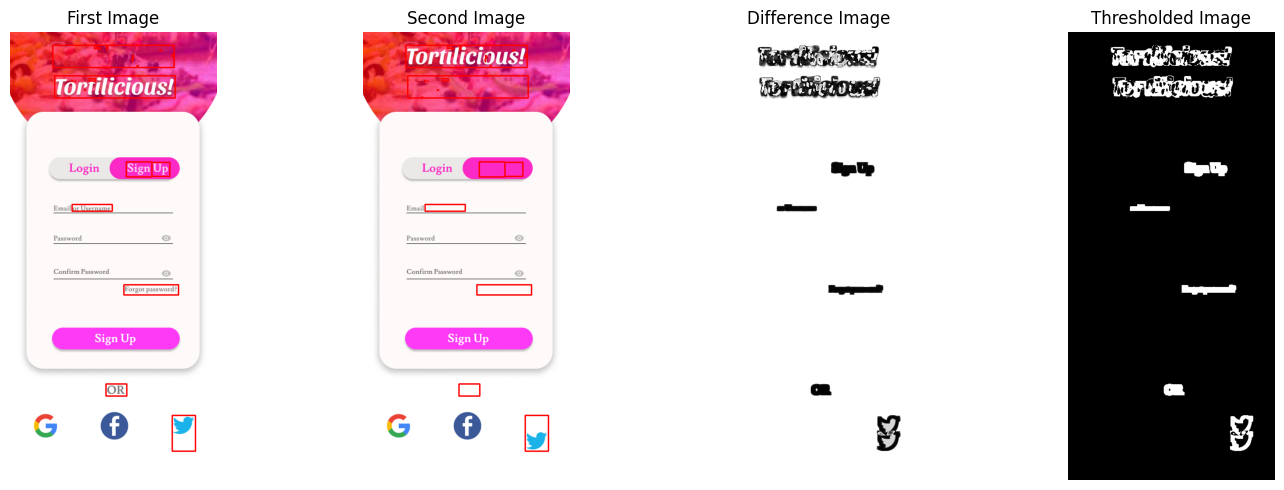

In [ ]:
import matplotlib.pyplot as plt

# Create a figure and set of subplots with 1 row and 4 columns
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Display the first image
axes[0].imshow(cv2.cvtColor(first_image, cv2.COLOR_BGR2RGB))
axes[0].set_title('First Image')

# Display the second image
axes[1].imshow(cv2.cvtColor(second_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('Second Image')

# Display the difference image
axes[2].imshow(diff, cmap='gray')
axes[2].set_title('Difference Image')

# Display the thresholded image
axes[3].imshow(thresh, cmap='gray')
axes[3].set_title('Thresholded Image')

# Hide the axes
for ax in axes:
    ax.axis('off')

# Adjust layout to prevent overlap of titles
plt.tight_layout()

# Show the plot
plt.show()
